In [9]:
import numpy as np

import matplotlib.pyplot as plt

import pymc3 as pm
import arviz as az

# Linear regression: data

$x$ is randomly chosen between 0 and 5. $y = 3x + \varepsilon$ where $\varepsilon ~ \mathcal{N}(0, 0.5^2)$.

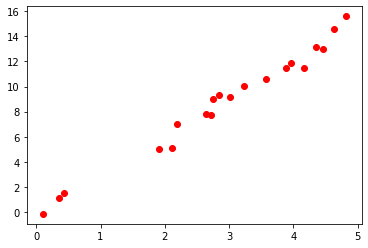

In [10]:
np.random.seed(0)

true_w = 3
true_sigma = 0.5

num_obs = 20
X_obs = np.random.uniform(low=0, high=5, size=num_obs)
noise = np.random.normal(loc=0, scale=true_sigma, size=num_obs)
y_obs = true_w * X_obs + noise

xs = np.linspace(0, 10, 1000)
plt.scatter(X_obs, y_obs, c='r', label='obs')

plt.show()

# Linear regression: least-squares solution

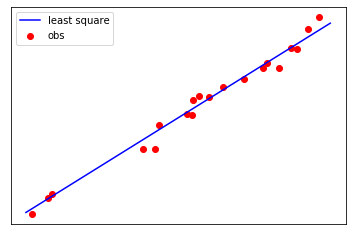

In [11]:
w_, res, rank, s = np.linalg.lstsq(
    X_obs[:, np.newaxis], y_obs[:, np.newaxis], rcond=None
)

xs = np.linspace(0, 5, 100)

plt.scatter(X_obs, y_obs, c='r', label='obs')

plt.plot(xs, xs * w_[0], c='b', label='least square')

plt.legend()
plt.xticks([])
plt.yticks([])

plt.show()

# Bayesian linear regression

In [12]:
with pm.Model() as linear_model:
    w = pm.Normal('w', mu=0, sigma=1)
    sigma = pm.Uniform('sigma', lower=0, upper=1)
    epsilon = pm.Normal('epsilon', mu=0, sigma=sigma)
    
    obs = pm.Normal('obs', mu=X_obs * w, sigma=sigma, observed=y_obs)
    
    trace = pm.sample(100, random_seed=0)

Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [epsilon, sigma, w]


Sampling 4 chains for 1_000 tune and 100 draw iterations (4_000 + 400 draws total) took 12 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


/Users/ankitrawat/opt/anaconda3/lib/python3.7/site-packages/arviz/stats/stats.py:487: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,


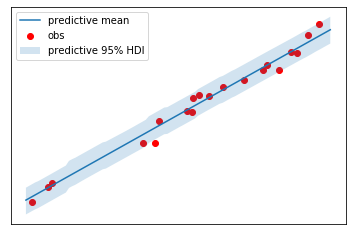

In [13]:
pp_samples = np.array([
    x * trace['w'] + trace['epsilon']
    for x in xs
]).T

pp_mean = pp_samples.mean(axis=0)
pp_hdi = az.hdi(pp_samples)
pp_low = pp_hdi[:, 0]
pp_high = pp_hdi[:, 1]

plt.scatter(X_obs, y_obs, c='r', label='obs')

plt.plot(xs, pp_mean, label='predictive mean')
plt.fill_between(xs, pp_high, pp_low, alpha=.2, label='predictive 95% HDI')
plt.legend()

plt.xticks([])
plt.yticks([])

plt.show()

In [17]:
trace['w']

array([3.00680721, 3.01073481, 3.01073481, 3.01155012, 3.00490676,
       3.00490676, 3.00209863, 3.079416  , 3.03149343, 3.02618653,
       3.02099658, 3.0281609 , 3.04071974, 3.04071974, 3.01043764,
       3.01868485, 2.96976088, 2.9932014 , 3.0195942 , 3.01309561,
       3.01309561, 3.01869754, 3.02065138, 3.04155896, 3.04729691,
       2.8633188 , 2.8900377 , 3.10334938, 2.94807291, 2.93911938,
       2.96286414, 2.9870893 , 3.05769882, 2.96756571, 3.03571516,
       2.96244614, 3.0790928 , 2.96452368, 3.00851119, 3.00675095,
       3.00675095, 3.0733661 , 3.03285225, 2.99644217, 2.99126404,
       3.01563257, 2.95971995, 3.05116955, 3.11169295, 3.13797643,
       3.03909382, 2.99237374, 2.99237374, 3.02155027, 3.03076703,
       3.03736538, 2.95997058, 3.04004577, 2.95794267, 2.95794267,
       2.90845374, 3.01444159, 3.05234344, 2.98693707, 2.96195986,
       2.97318905, 2.97318905, 3.0817367 , 2.93560525, 3.05729545,
       3.0763073 , 3.0901037 , 3.0314283 , 3.00617575, 3.00644

In [15]:
np.array([
    x * trace['w'] + trace['epsilon']
    for x in xs
]).T

array([[ 0.58204652,  0.73390547,  0.88576442, ..., 15.3123647 ,
        15.46422365, 15.6160826 ],
       [ 0.16400873,  0.31606604,  0.46812335, ..., 14.91356817,
        15.06562548, 15.21768279],
       [ 0.16400873,  0.31606604,  0.46812335, ..., 14.91356817,
        15.06562548, 15.21768279],
       ...,
       [ 0.47292898,  0.62700047,  0.78107195, ..., 15.41786302,
        15.5719345 , 15.72600599],
       [ 0.04264941,  0.19245797,  0.34226653, ..., 14.57407943,
        14.72388798, 14.87369654],
       [ 0.90061563,  1.05018635,  1.19975706, ..., 15.40897511,
        15.55854583, 15.70811654]])

In [18]:
az.hdi(pp_samples)

/Users/ankitrawat/opt/anaconda3/lib/python3.7/site-packages/arviz/stats/stats.py:487: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,


array([[-1.26823005,  1.09487842],
       [-1.1194795 ,  1.2487823 ],
       [-0.97072895,  1.40268618],
       [-0.8219784 ,  1.55659007],
       [-0.70524634,  1.67270874],
       [-0.55214908,  1.82366579],
       [-0.39905181,  1.97462283],
       [-0.24595455,  2.12557988],
       [-0.09285728,  2.2780884 ],
       [ 0.06023998,  2.433166  ],
       [ 0.21333725,  2.5882436 ],
       [ 0.36643451,  2.7433212 ],
       [ 0.51677654,  2.8983988 ],
       [ 0.66552709,  3.0534764 ],
       [ 1.06965645,  3.46329109],
       [ 1.21981751,  3.61303339],
       [ 1.34164941,  3.73430491],
       [ 1.5013082 ,  3.88614942],
       [ 1.66096698,  4.03799393],
       [ 1.81589662,  4.18983844],
       [ 1.97007127,  4.34168295],
       [ 2.12078389,  4.49352745],
       [ 2.27094495,  4.64537196],
       [ 2.42110601,  4.79721647],
       [ 2.57126707,  4.94906098],
       [ 2.72142814,  5.10090549],
       [ 2.78528077,  5.16462019],
       [ 2.93578053,  5.30923225],
       [ 3.0862803 ,